In [40]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

(3, 3, 1, 1) (1, 361, 421, 1)


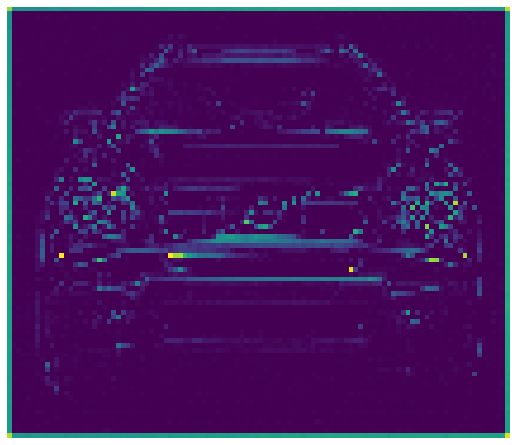

In [91]:
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],  # changing the mid value, will have differences in the sharpness
    [-1, -1, -1],
])
image_path = "input/car_feature.jpg"

image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)
# plt.figure(figsize=(6, 6))
# plt.imshow(tf.squeeze(image))
# plt.axis('off')
# plt.show();

image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

print(kernel.shape, image.shape)

image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in lesson 4!
    strides=4,
    padding='SAME',
)
image_detect = tf.nn.relu(image_filter)
plt.figure(figsize=(9, 9))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

(3, 3, 3, 1) (1, 1081, 1920, 3)


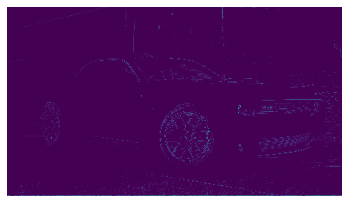

In [90]:
kernel = tf.constant([
    [[-1, -1, -1],
    [-1,  12, -1],  # changing the mid value, will have differences in the sharpness
    [-1, -1, -1],],
    
    [[-1, -1, -1],
    [-1,  8, -1],  # changing the mid value, will have differences in the sharpness
    [-1, -1, -1],],
    
    [[-1, -1, -1],
    [-1,  2, -1],  # changing the mid value, will have differences in the sharpness
    [-1, -1, -1],],
])
image_path = "input/car_2.jpeg"

image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

print(kernel.shape, image.shape)

image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    # we'll talk about these two in lesson 4!
    strides=4,
    padding='SAME',
)
image_detect = tf.nn.relu(image_filter)
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

In [94]:
import sympy
sympy.init_printing()
from IPython.display import display
image = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
])

kernel = np.array([
    [1, -1],
    [1, -1],
])

display(sympy.Matrix(image))
display(sympy.Matrix(kernel))

# Reformat for Tensorflow
image = tf.cast(image, dtype=tf.float32)
image = tf.reshape(image, [1, *image.shape, 1])
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='VALID',
)
display(sympy.Matrix(tf.squeeze(image_filter).numpy()))

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  1  1  1⎥
⎢                ⎥
⎣0  1  0  0  0  0⎦

⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

⎡-2.0  2.0   0    0  0⎤
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0  -1.0  0  0⎥
⎢                     ⎥
⎣-2.0  2.0  -1.0  0  0⎦